In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [7]:
# 2. Load the dataset
df = pd.read_csv('iris.csv')
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [9]:
# 3. Check for missing values and data info
print("\nDataset Info:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Missing values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [11]:
# 4. Encode the target column if needed
if df['species'].dtype == 'object':
    le = LabelEncoder()
    df['species'] = le.fit_transform(df['species'])

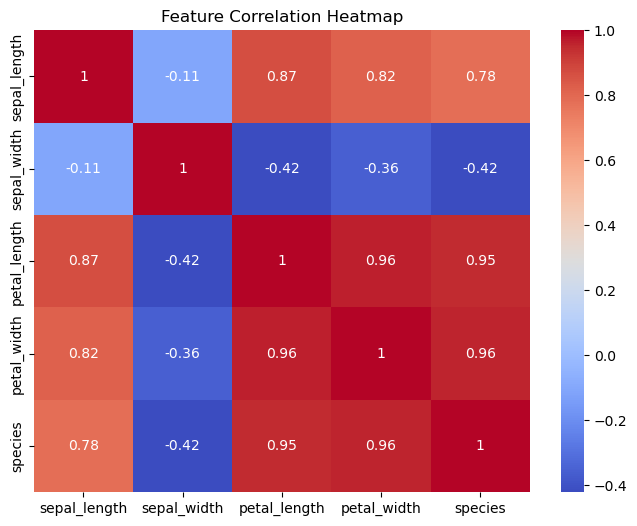

In [53]:

# 5. Visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [43]:
# 7. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# 8. Train a model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# 9. Make predictions
y_pred = model.predict(X_test)

In [23]:
# 10. Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



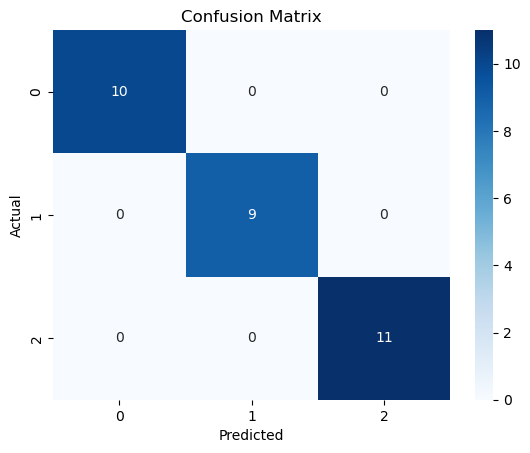

In [39]:
# 11. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

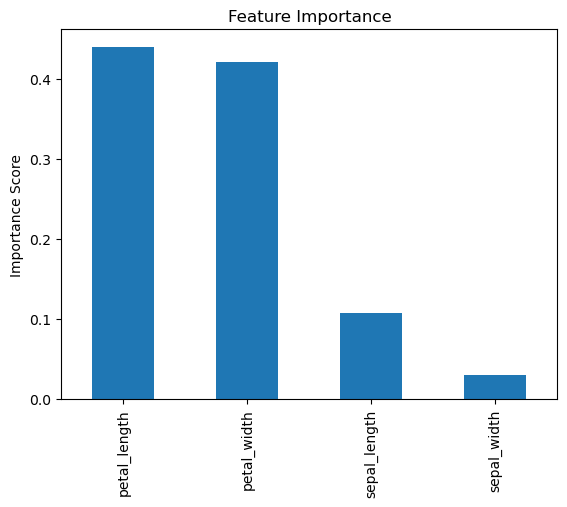

In [27]:
# 12. Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', title='Feature Importance')
plt.ylabel('Importance Score')
plt.show()

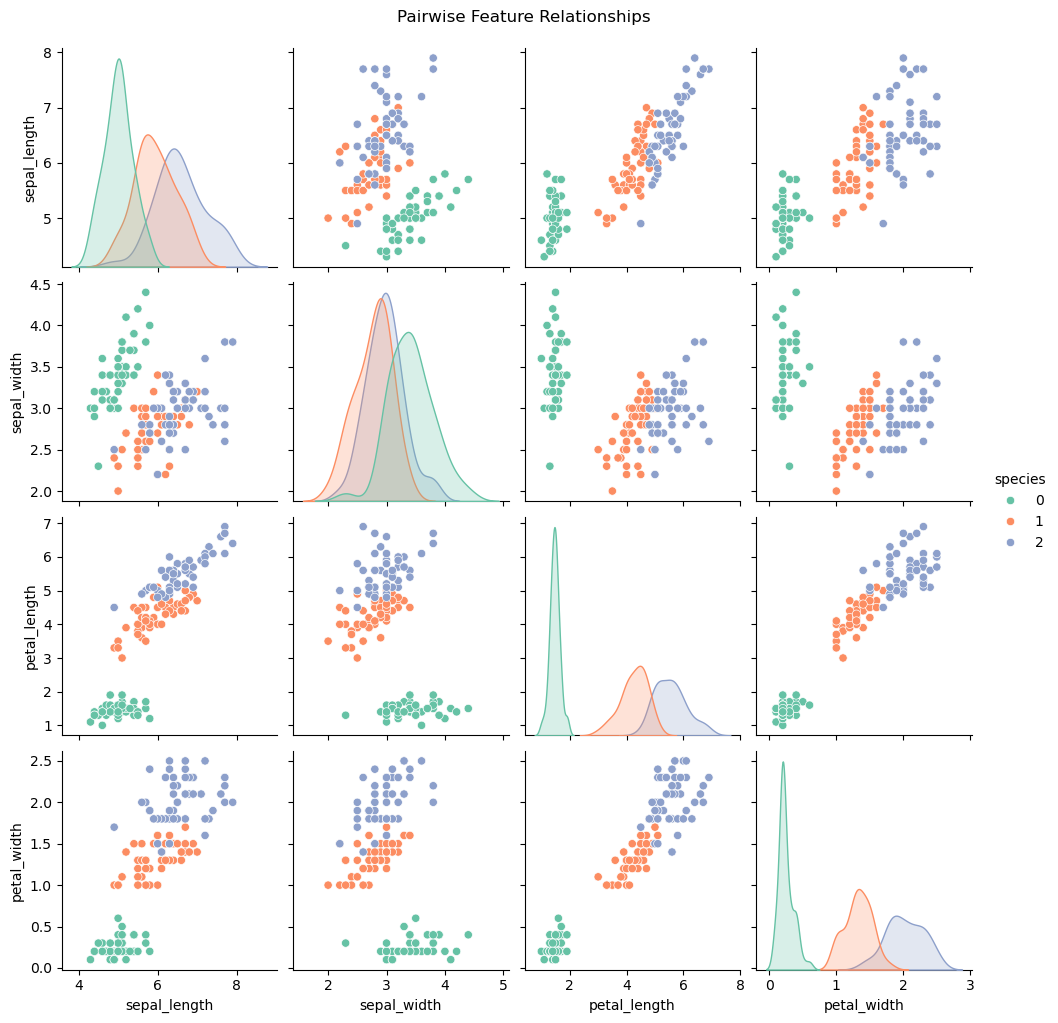

In [55]:
# 1. Pairplot: Visualize pairwise relationships between features by species
sns.pairplot(df, hue='species', palette='Set2', diag_kind='kde')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

In [69]:
from sklearn.decomposition import PCA

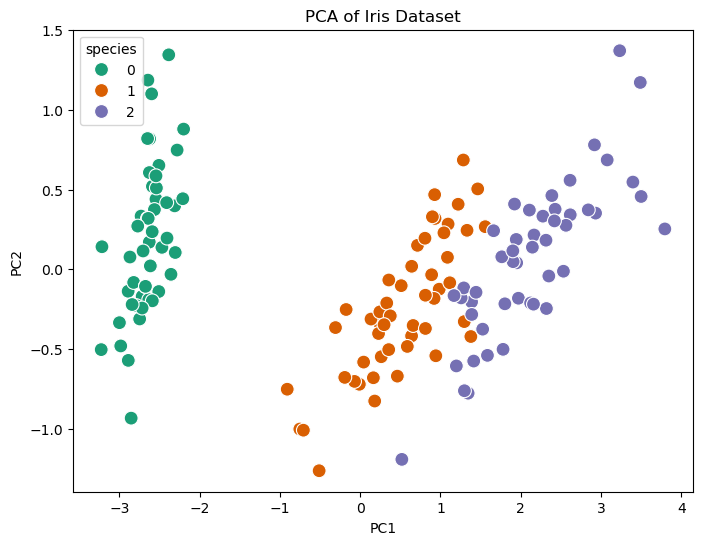

In [71]:
# ✅ Import PCA
from sklearn.decomposition import PCA

# 5. PCA (Principal Component Analysis) Plot: Reduce to 2D for visualization
pca = PCA(n_components=2)
components = pca.fit_transform(X)
df_pca = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
df_pca['species'] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=df_pca, palette='Dark2', s=100)
plt.title('PCA of Iris Dataset')
plt.show()


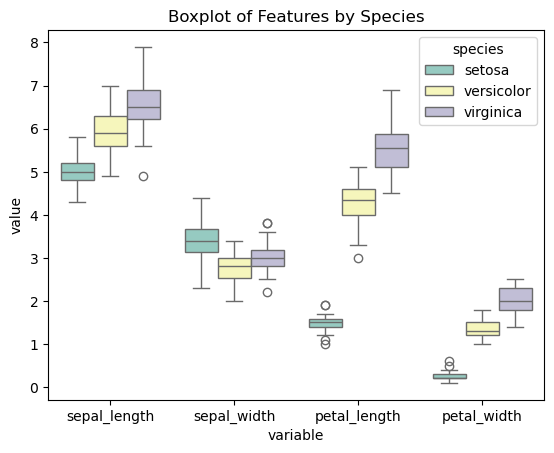

In [75]:
# Define feature columns
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Boxplot
df_melted = df.copy()
df_melted['species'] = le.inverse_transform(df['species'])  # decode species labels
df_melt = pd.melt(df_melted, id_vars="species", value_vars=features)

sns.boxplot(x="variable", y="value", hue="species", data=df_melt, palette="Set3")
plt.title("Boxplot of Features by Species")
plt.show()
